# Stock Screener

### Dans ce stock screener, j'aurais besoin de : <br><br>
<ol>
    <li>Données sur forex et crypto en temps réel </li><br>
    <li>Une fréquence de mise à jour, qui se fera toute les 30 secondes </li><br>
    <li>L'analyse financière puis une Data Visualisation sur streamLit </li><br>
    <li>Ajouter des alertes de prix, des flux de données éco </li><br>
</ol>

    



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from yahoo_fin import stock_info as si


In [53]:
from datetime import datetime, timedelta
from yahoo_fin import stock_info as si
import pandas as pd
import mplfinance as mpf

ticker = "TSLA"
end_date = datetime.now()
start_date = end_date-timedelta(days=600)

historical_prices = si.get_data(ticker, start_date=start_date, end_date=end_date)
df = historical_prices

ma80 = df['close'].rolling(80).mean()

def tendancesDeF():
    if ma80.iloc[-1] > si.get_live_price(ticker):
        print("La tendance de fond est baissière sur ", ticker)
    else :
        print("La tendance de fond est haussière sur", ticker)

tendancesDeF()


top5TradableStocks = si.get_day_most_active().head()


La tendance de fond est haussière sur TSLA


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,TSLA,"Tesla, Inc.",208.31,6.27,3.10,213739000.0,166876000.0,659114000000.0,55.85
1,DKNG,DraftKings Inc.,20.54,2.73,15.33,81839000.0,13504000.0,9276000000.0,NaN
2,PLTR,Palantir Technologies Inc.,9.20,-0.51,-5.25,62138000.0,39283000.0,19138000000.0,NaN
3,AMZN,"Amazon.com, Inc.",97.20,-0.95,-0.97,60029000.0,75388000.0,996038000000.0,97.20
4,AAPL,Apple Inc.,152.55,-1.16,-0.75,59144000.0,75440000.0,2.414T,25.90


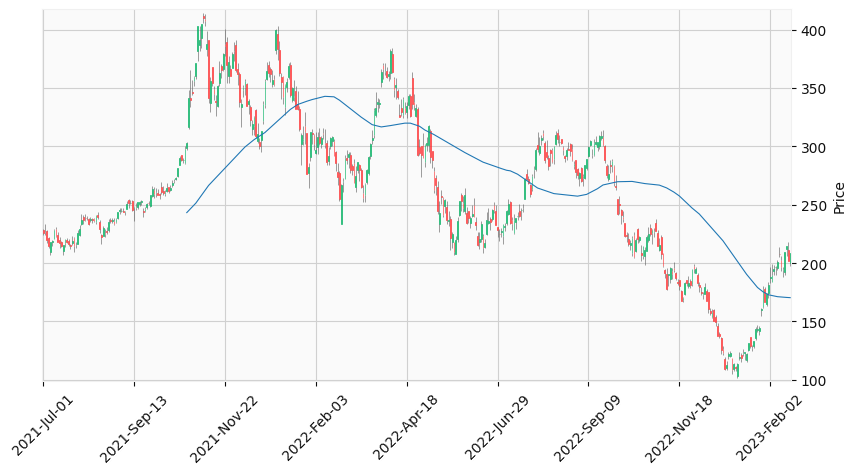

In [54]:
mpf_params = {
    'type': 'candle', 
    'mav': 80, 
    'volume': False, 
    'figratio': (12,6), 
    'figscale': 0.75
}

mpf.plot(df, **mpf_params, tight_layout=True, style='yahoo')